# Pharmaceuticals

### ANALYSIS

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = 'Resources/Mouse_metadata.csv'
study_results_path = 'Resources/Study_results.csv'

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

complete_data = pd.merge(study_results, mouse_metadata, how='left')

complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Mice Number
mouse_count = len(complete_data['Mouse ID'].unique())
mouse_count

249

In [4]:
# Mouse ID and Timepoint Duplicates
id1 = complete_data[['Mouse ID', 'Timepoint']]
id = complete_data[id1.duplicated(keep=False)]
id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Dropped Duplicates Dataframe
cleaned_duplicates = complete_data[complete_data['Mouse ID'] != 'g989']
cleaned_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Number of mice in the cleaned_duplicates dataframe
no_duplicates_mice_count = len(cleaned_duplicates['Mouse ID'].unique())
no_duplicates_mice_count

248

### SUMMARY STATISTICS 

In [7]:
# Tumor Volume Stats based on Drug Regimen

drug_regimen = complete_data['Drug Regimen'].sort_values().unique()
tumor_vol_mean = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_variance = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_stddev = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


tumor_vol_df = pd.DataFrame({"Drug Regimen": drug_regimen,
                             "Mean Tumor Volume": tumor_vol_mean,
                            "Median Tumor Volume": tumor_vol_median,
                            "Tumor Volume Variance": tumor_vol_variance,
                            "Tumor Volume Std. Dev.": tumor_vol_stddev,
                            "Tumor Volume Std. Err.": tumor_vol_sem})


tumor_vol_df = tumor_vol_df.set_index('Drug Regimen')
tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
drug_count = complete_data['Drug Regimen'].value_counts()

<Axes: >

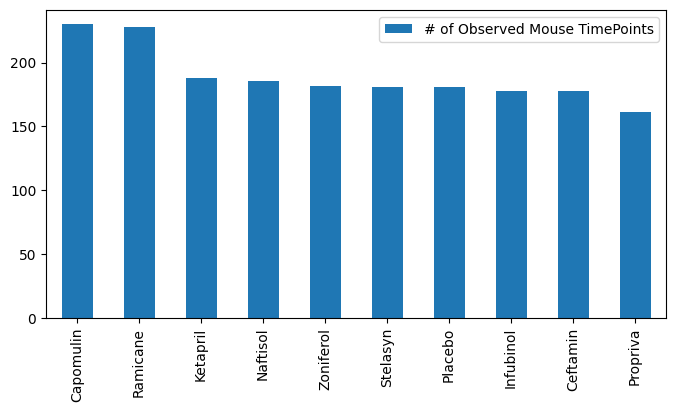

In [9]:
# Bar Plot Using Pandas

bar_plot_pandas = drug_count.to_frame(name='# of Observed Mouse TimePoints')

bar_plot_pandas.plot(kind='bar', figsize=(8,4))


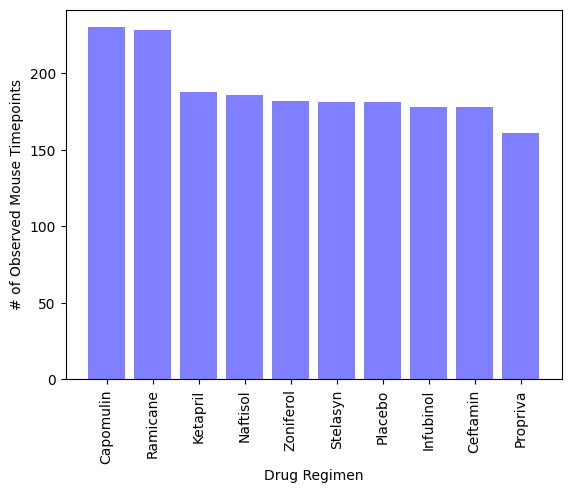

In [10]:
# Bar Plot Using Pyplot
drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
         'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
mouse_points = list(drug_count)  

plt.bar(drugs, mouse_points, color='b', alpha=0.5)

plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [11]:
m_vs_f = complete_data["Sex"].value_counts()

<Axes: ylabel='Sex'>

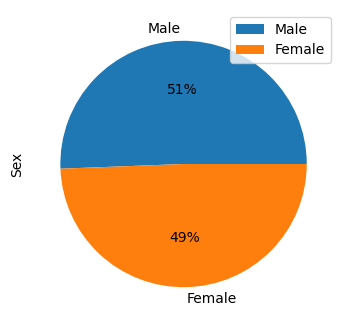

In [12]:
# Pie Plot using Pandas(Distribution of female vs. male mice)

male_female = pd.DataFrame({"Sex":[958, 935]},
                           index=['Male', 'Female'])

male_female.plot.pie(figsize=(8,4), y='Sex', autopct='%1.0f%%')

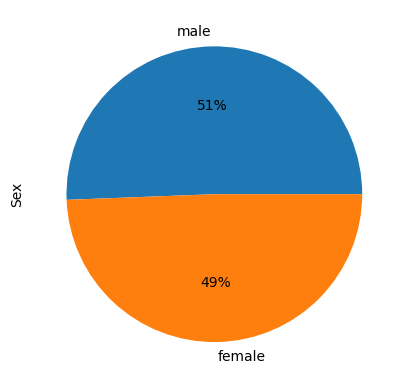

In [13]:
# Pie Plot using Pyplot(Distribution of female vs. male mice)
gender = ["male", "female"]
distribution = [958, 935]

plt.pie(distribution, labels=gender, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

In [14]:
# Quartiles, Outliers, and Boxplots

last_timepoint1 = complete_data.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = pd.DataFrame(last_timepoint1)

In [15]:
merged_df = last_timepoint.merge(complete_data, on=['Mouse ID', 'Timepoint'], how='inner')

In [16]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = [] 

for treatment in treatments:
    drugs1 = merged_df.loc[merged_df["Drug Regimen"] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(drugs1)
    
    quartiles = drugs1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = drugs1.loc[(drugs1 < lower_bound) | (drugs1 > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


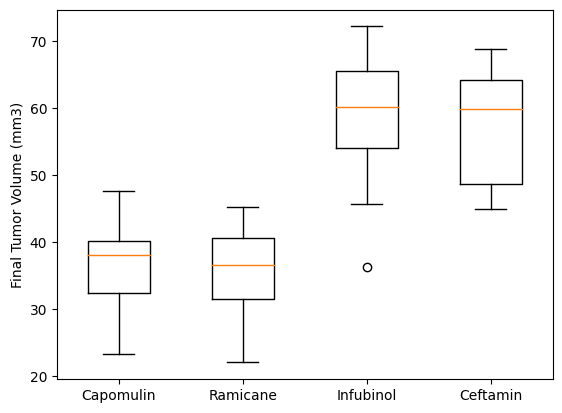

In [17]:
# Box Plot
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=treatments, widths=0.5)
plt.show()

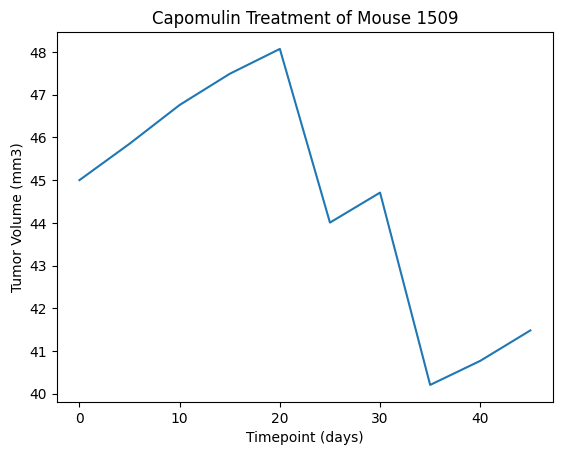

In [18]:
# Line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap = cleaned_duplicates[cleaned_duplicates["Drug Regimen"]== "Capomulin"]
m_id = cap.loc[cap["Mouse ID"]== "l509"]
plt.plot(m_id["Timepoint"], m_id["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")
plt.show()

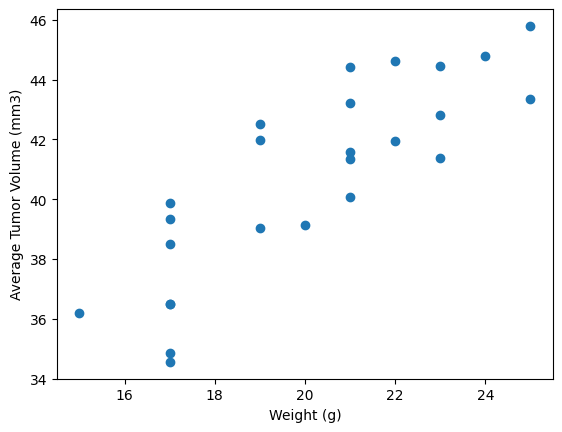

In [20]:
# Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight_tumor = cap.groupby('Mouse ID').agg(avg_tumor=('Tumor Volume (mm3)', 'mean'), weight = ('Weight (g)', 'mean'))

plt.scatter(weight_tumor['weight'], weight_tumor['avg_tumor'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The r-squared is: 0.7088568047708723


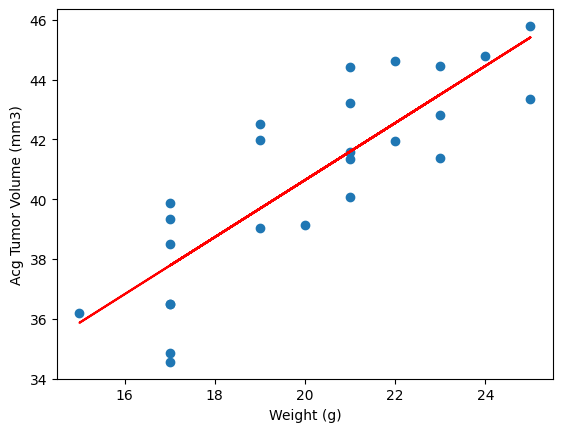

In [22]:
# Correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x = weight_tumor['weight']
y = weight_tumor['avg_tumor']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(4,10),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Acg Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()